# Pre-run config checks
Move through this section to check that your config looks all good 

In [5]:
import gempyor

import pathlib
from gempyor import seir, model_info, file_paths, compartments
from gempyor import outcomes
from gempyor.utils import config, Timer, read_df, profile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
os.chdir('/Users/saraloo/Documents/flepi_repos/COVID19_USA/')

## Set up model info

In [6]:
config_filepath = "config_SMH_R18_allBoo_highIE_blk1.yml"

# config.clear()
# config.read(user=False)
config.set_file(config_filepath)
print(config_filepath)

s = model_info.ModelInfo(
    config=config,
    nslots=1,
    seir_modifiers_scenario="None",
    write_csv=False,
    )


config_SMH_R18_allBoo_highIE_blk1.yml


## Check model components are set up properly

### Compartments and transitions

In [8]:
test = compartments.Compartments(seir_config=config["seir"], compartments_config=config["compartments"])
# test.get_transition_array()
test.get_compartments_explicitDF()
# test.parse_transitions(seir_config=config["seir"])

,mc_infection_stage,mc_vaccination_stage,mc_variant_type,mc_age_strata,mc_name
0,E,unvaccinated,ALL,age0to17,E_unvaccinated_ALL_age0to17
1,E,unvaccinated,ALL,age18to64LR,E_unvaccinated_ALL_age18to64LR
2,E,unvaccinated,ALL,age18to64HR,E_unvaccinated_ALL_age18to64HR
3,E,unvaccinated,ALL,age65to100,E_unvaccinated_ALL_age65to100
4,E,vaccinated,ALL,age0to17,E_vaccinated_ALL_age0to17
...,...,...,...,...,...
115,X0,unvaccinated,ALL,age65to100,X0_unvaccinated_ALL_age65to100
116,X0,vaccinated,ALL,age0to17,X0_vaccinated_ALL_age0to17
117,X0,vaccinated,ALL,age18to64LR,X0_vaccinated_ALL_age18to64LR
118,X0,vaccinated,ALL,age18to64HR,X0_vaccinated_ALL_age18to64HR


In [9]:
sav = test.get_transition_array()

# these are the transition rates
df = pd.DataFrame(sav[0])
df

,0
0,1*1*1*1
1,alpha*1*1*1
2,sigma_OMICRON*1*1*1
3,3*gamma*1*1*1
4,epsilon+omegaph4*1*1*1
...,...
88,eta_X9toX9_highIE*1*1*nuage65to100
89,eta_X10toX10_highIE*1*1*nuage0to17
90,eta_X10toX10_highIE*1*1*nuage18to64LR
91,eta_X10toX10_highIE*1*1*nuage18to64HR


In [10]:
# check that things work in gempyor by setting up a gempyor object

gempyor_simulator = gempyor.GempyorInference(
    config_filepath=config_filepath,
    run_id="test_run_id",
    prefix="test_prefix/",
    stoch_traj_flag=False,
    autowrite_seir=True,
    # spatial_path_prefix="../tests/npi/",  # prefix where to find the folder indicated in spatial_setup$
)

  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> ModelInfo USA_inference_all; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


### Input parameters and timeseries

In [11]:

params_draw_arr = (
    gempyor_simulator.get_seir_parameters()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)

params_const = gempyor_simulator.get_seir_parametersDF()
# len(params_const)
params_const = params_const['parameter'].to_numpy()
params_const


array(['sigma', 'sigma_OMICRON', 'alpha', 'r0', 'gamma', 'epsilon',
       'chi_OMICRON', 'omegaph4', 'zeta_r18', 'theta0', 'theta1',
       'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7',
       'theta8', 'theta9', 'theta10'], dtype=object)

In [12]:
params_names = gempyor_simulator.modinf.parameters.pnames
params_names = np.array(params_names)
params_ts = np.setdiff1d(params_names, params_const)
which_ts = np.where(~np.isin(params_names, params_const))[0]
which_ts

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31])

In [20]:
params_names

array(['sigma', 'sigma_OMICRON', 'alpha', 'r0', 'gamma', 'epsilon',
       'chi_OMICRON', 'omegaph4', 'zeta_r18', 'nuage0to17',
       'nuage18to64LR', 'nuage18to64HR', 'nuage65to100',
       'eta_X0toX3_highIE', 'eta_X0toX4_highIE', 'eta_X0toX5_highIE',
       'eta_X1toX4_highIE', 'eta_X1toX5_highIE', 'eta_X2toX4_highIE',
       'eta_X2toX5_highIE', 'eta_X2toX6_highIE', 'eta_X3toX5_highIE',
       'eta_X3toX6_highIE', 'eta_X4toX6_highIE', 'eta_X4toX7_highIE',
       'eta_X5toX7_highIE', 'eta_X6toX7_highIE', 'eta_X6toX8_highIE',
       'eta_X7toX8_highIE', 'eta_X8toX9_highIE', 'eta_X9toX9_highIE',
       'eta_X10toX10_highIE', 'theta0', 'theta1', 'theta2', 'theta3',
       'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'theta9',
       'theta10'], dtype='<U19')

In [21]:
np.shape(params_draw_arr)

(43, 897, 51)

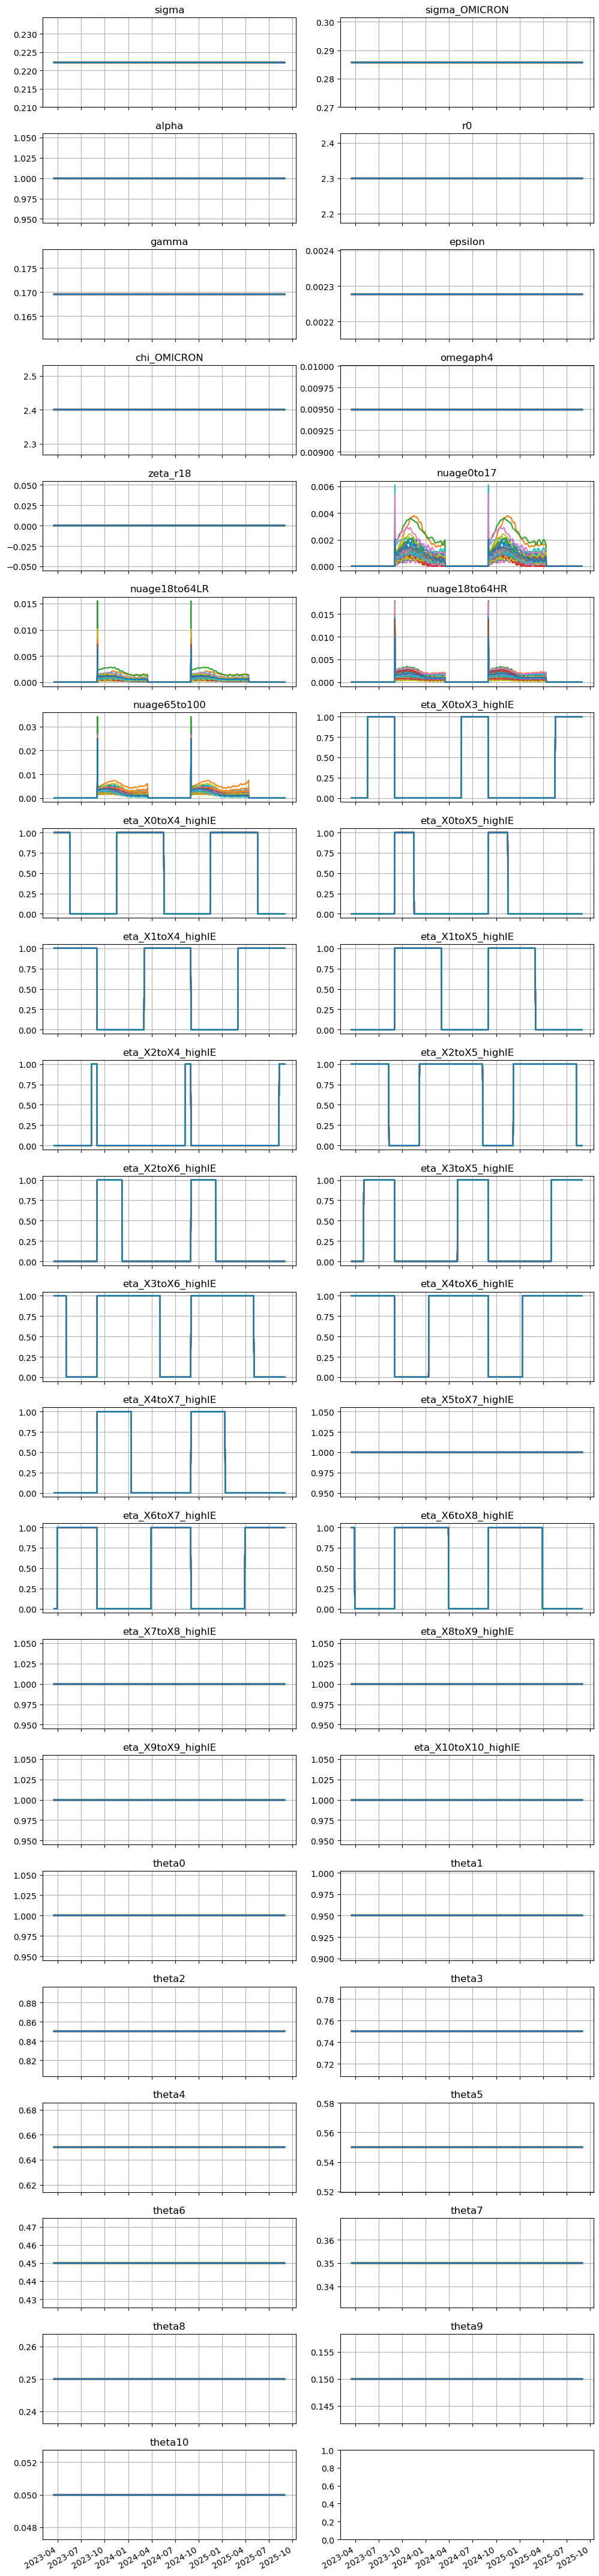

In [22]:
# plot all parameters
fig, axes = plt.subplots(math.ceil(len(params_draw_arr)/2),2, figsize=(5*2,len(params_draw_arr)), sharex=True)

for i, c in enumerate(params_draw_arr):
    ax = axes.flat[i]
    ax.set_title(params_names[i])
    ax.grid()
    ax.plot(gempyor_simulator.modinf.dates,c)

fig.autofmt_xdate()
fig.tight_layout()

### Modifiers

In [ ]:
# check that parameters and modififiers all read in properly
npi_seir = (
    gempyor_simulator.get_seir_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_snpi_df>) or (bypass_FN=<some_snpi_filename>)
npi_outcome = (
    gempyor_simulator. get_outcome_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_hnpi_df>) or (bypass_FN=<some_hnpi_filename>)
# param_reduc = gempyor_simulator.get_seir_parameter_reduced(
#     npi_seir=npi_seir
# )  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
param_reduc = gempyor_simulator.get_seir_parameter_reduced(
    npi_seir=npi_seir, p_draw=params_draw_arr
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)

In [ ]:
# What is getting reduced?
npi_seir.reductions.keys()
# npi_outcome.reductions.keys()

dict_keys(['r0', 'chi_omicron', 'epsilon', 'zeta'])

In [ ]:
npi_seir.getReduction("r0")

,2023-03-19,2023-03-20,2023-03-21,2023-03-22,2023-03-23,2023-03-24,2023-03-25,2023-03-26,2023-03-27,2023-03-28,...,2025-08-12,2025-08-13,2025-08-14,2025-08-15,2025-08-16,2025-08-17,2025-08-18,2025-08-19,2025-08-20,2025-08-21
56000,1.055209,1.055209,1.055209,1.055209,1.055209,1.055209,1.055209,1.055209,1.055209,1.055209,...,0.861714,0.861714,0.861714,0.861714,0.861714,0.861714,0.861714,0.861714,0.861714,0.861714
50000,1.054029,1.054029,1.054029,1.054029,1.054029,1.054029,1.054029,1.054029,1.054029,1.054029,...,0.853533,0.853533,0.853533,0.853533,0.853533,0.853533,0.853533,0.853533,0.853533,0.853533
11000,1.048063,1.048063,1.048063,1.048063,1.048063,1.048063,1.048063,1.048063,1.048063,1.048063,...,0.854047,0.854047,0.854047,0.854047,0.854047,0.854047,0.854047,0.854047,0.854047,0.854047
02000,1.057821,1.057821,1.057821,1.057821,1.057821,1.057821,1.057821,1.057821,1.057821,1.057821,...,0.857537,0.857537,0.857537,0.857537,0.857537,0.857537,0.857537,0.857537,0.857537,0.857537
38000,1.059582,1.059582,1.059582,1.059582,1.059582,1.059582,1.059582,1.059582,1.059582,1.059582,...,0.854368,0.854368,0.854368,0.854368,0.854368,0.854368,0.854368,0.854368,0.854368,0.854368
46000,1.050661,1.050661,1.050661,1.050661,1.050661,1.050661,1.050661,1.050661,1.050661,1.050661,...,0.863328,0.863328,0.863328,0.863328,0.863328,0.863328,0.863328,0.863328,0.863328,0.863328
10000,1.041517,1.041517,1.041517,1.041517,1.041517,1.041517,1.041517,1.041517,1.041517,1.041517,...,0.846929,0.846929,0.846929,0.846929,0.846929,0.846929,0.846929,0.846929,0.846929,0.846929
30000,1.061590,1.061590,1.061590,1.061590,1.061590,1.061590,1.061590,1.061590,1.061590,1.061590,...,0.866625,0.866625,0.866625,0.866625,0.866625,0.866625,0.866625,0.866625,0.866625,0.866625
44000,1.055298,1.055298,1.055298,1.055298,1.055298,1.055298,1.055298,1.055298,1.055298,1.055298,...,0.851153,0.851153,0.851153,0.851153,0.851153,0.851153,0.851153,0.851153,0.851153,0.851153
23000,1.046391,1.046391,1.046391,1.046391,1.046391,1.046391,1.046391,1.046391,1.046391,1.046391,...,0.845462,0.845462,0.845462,0.845462,0.845462,0.845462,0.845462,0.845462,0.845462,0.845462


In [ ]:
param_reduc

,sigma,sigma_OMICRON,alpha,r0,gamma,epsilon,chi_OMICRON,omegaph4,zeta,nuage0to17,...,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,subpop,date
0,0.222222,0.285714,1.0,2.463409,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,56000,2023-03-19
1,0.222222,0.285714,1.0,2.463409,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,56000,2023-03-20
2,0.222222,0.285714,1.0,2.463409,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,56000,2023-03-21
3,0.222222,0.285714,1.0,2.463409,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,56000,2023-03-22
4,0.222222,0.285714,1.0,2.463409,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,56000,2023-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45232,0.222222,0.285714,1.0,2.027203,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,06000,2025-08-17
45233,0.222222,0.285714,1.0,2.027203,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,06000,2025-08-18
45234,0.222222,0.285714,1.0,2.027203,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,06000,2025-08-19
45235,0.222222,0.285714,1.0,2.027203,0.181839,0.002167,2.405472,0.009489,0.0,0.0,...,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,06000,2025-08-20


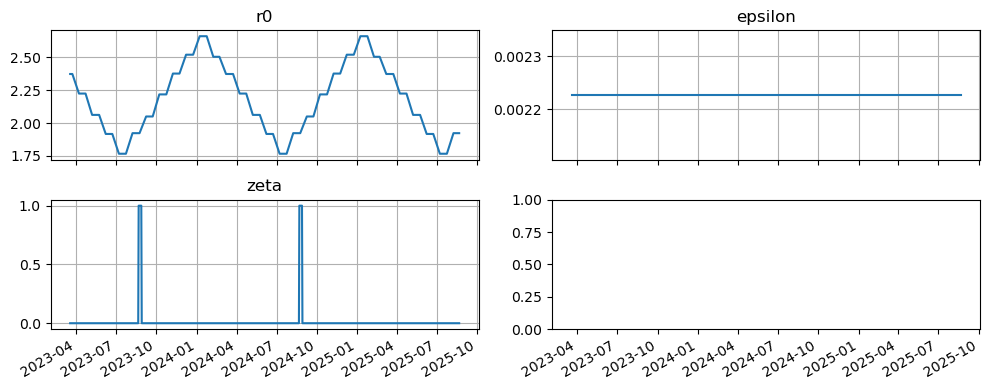

In [ ]:
# plot reductions
param_reduc = param_reduc[param_reduc["subpop"] == "06000"]
param_reduc = param_reduc.set_index("date")
# print(param_reduc)
param_reduc = param_reduc.drop("subpop",axis=1)
param_reduc = param_reduc.filter(items=npi_seir.reductions.keys())

fig, axes = plt.subplots(math.ceil(len(npi_seir.reductions.keys())/2),2, figsize=(5*2,len(npi_seir.reductions.keys())), sharex=True)

for i, c in enumerate(param_reduc.columns):
    ax = axes.flat[i]
    ax.set_title(c)
    ax.grid()
    ax.plot(param_reduc[c])

# for i, c in enumerate(hosp.columns):
#     ax = axes.flat[i]
#     ax.set_title(c)
#     ax.grid()
#     ax.plot(hosp[c])
fig.autofmt_xdate()
fig.tight_layout()

## Check one simulation 

In [13]:
gempyor_simulator.one_simulation(sim_id2write=0)


Loaded subpops in loaded relative probablity file: 51 Intersect with seir simulation:  51 kept


FileNotFoundError: model_output/test_prefix/init/000000000.test_run_id.init.parquet

# Outputs


In [ ]:
from pathlib import Path
config_name = config_filepath
run_id = "test_prefix"
data_dir = "../COVID19_USA"
fs_results_path = "model_output" 

def get_all_filenames(file_type, model_output_path="model_output/", finals_only=False, intermediates_only=True, ignore_chimeric=True) -> list:
    """
      fuzzy list of all filenames of a specific type in a directory:
    """
    if file_type=="seed":
        ext="csv"
    else: 
        ext="parquet"
    l = []
    for f in Path(str(model_output_path)).rglob(f'*.{ext}'):
        f = str(f)
        if file_type in f:
            if (finals_only and "final" in f) or (intermediates_only and "intermediate" in f) or (not finals_only and not intermediates_only):
                if not (ignore_chimeric and "chimeric" in f):
                    l.append(str(f))
    return l
class RunInfo():
    """ Store the information to reproduce and buid a run"""
    def __init__(self, run_id, config_path=None, folder_path=None):
        self.run_id = run_id
        self.config_path = config_path
        self.folder_path = folder_path
        self.gempyor_inference=None

    def get_all_filenames(self, file_type, finals_only=False, intermediates_only=True, ignore_chimeric=True) -> list:
        return get_all_filenames(file_type, model_output_path=self.folder_path, finals_only=finals_only, intermediates_only=intermediates_only, ignore_chimeric=ignore_chimeric)


run_info = RunInfo(run_id = run_id, 
                   config_path= f"{data_dir}/{config_name}",
                   folder_path = f"{fs_results_path}")

## Hosp

In [ ]:
hosp = gempyor.read_df("./model_output/test_prefix/hosp/000000000.test_run_id.hosp.parquet")
hosp = hosp[hosp["subpop"] == "06000"]
hosp = hosp.set_index("date")
print(hosp)
hosp = hosp.drop("subpop",axis=1)

           subpop  incidI_unvaccinated_ALL_age0to17ph4  \
date                                                     
2023-03-19  06000                         67703.372077   
2023-03-20  06000                         67703.372077   
2023-03-21  06000                         89071.590211   
2023-03-22  06000                         89071.590211   
2023-03-23  06000                        101598.390896   
...           ...                                  ...   
2025-08-17  06000                         25663.239460   
2025-08-18  06000                         25663.239460   
2025-08-19  06000                         26641.744551   
2025-08-20  06000                         26641.744551   
2025-08-21  06000                         27668.327017   

            incidI_vaccinated_ALL_age0to17ph4  \
date                                            
2023-03-19                        8830.199826   
2023-03-20                        8830.199826   
2023-03-21                       11747.868603   


In [ ]:
# read in data
data = read_df("data/us_data.csv")
data = data[data["subpop"] == "06000"]
data = data.set_index("date")
data = data.drop("subpop",axis=1)
data = data[['incidH', 'incidD']]
data.columns

Index(['incidH', 'incidD'], dtype='object')

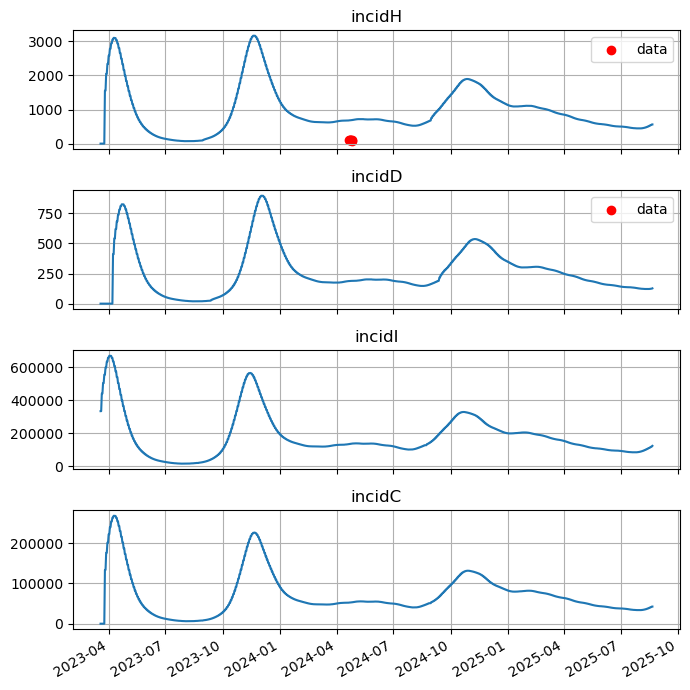

In [ ]:
# plot hosp files for sanity check
hosp = hosp[['incidH', 'incidD','incidI', 'incidC']]

fig, axes = plt.subplots(4, 1, figsize=(7, 7), sharex=True)    

for i, c in enumerate(hosp.columns):
    ax = axes.flat[i]
    ax.set_title(c)
    ax.grid()
    ax.plot(hosp[c])
# add points from data
for i, c in enumerate(data.columns):
    ax = axes.flat[i]
    ax.scatter(data.index, data[c], color="red", label="data")
    ax.legend()

fig.autofmt_xdate()
fig.tight_layout()

## SEIR

In [ ]:
# plot SEIR file for sanity check
seir = gempyor.read_df("./model_output/test_prefix/seir/000000000.test_run_id.seir.parquet")
seir

,mc_value_type,mc_infection_stage,mc_vaccination_stage,mc_variant_type,mc_age_strata,mc_name,56000,50000,11000,02000,...,37000,13000,39000,17000,42000,36000,12000,48000,06000,date
0,incidence,E,unvaccinated,ALL,age0to17,E_unvaccinated_ALL_age0to17,468.413982,565.724162,562.271039,1112.399808,...,29389.136214,26249.899768,41575.912312,8165.109136,18894.399808,34917.303311,32112.180910,104372.054530,121441.107587,2023-03-19
1,incidence,E,unvaccinated,ALL,age18to64LR,E_unvaccinated_ALL_age18to64LR,858.740046,1071.853656,1119.737716,1847.391617,...,52109.755732,47193.144210,72800.215491,13691.246163,34221.986717,66297.677551,68347.510656,168342.179541,211118.809362,2023-03-19
2,incidence,E,unvaccinated,ALL,age18to64HR,E_unvaccinated_ALL_age18to64HR,224.160390,374.642506,330.699740,583.386826,...,18213.801261,13779.910325,23623.910987,4371.083867,11899.289182,18917.846293,17193.804308,52000.987398,53773.046801,2023-03-19
3,incidence,E,unvaccinated,ALL,age65to100,E_unvaccinated_ALL_age65to100,191.254538,227.302460,165.489741,268.828760,...,11481.494845,9190.697253,15630.085431,2564.720683,7970.922303,13899.825378,19475.614833,29605.908464,35841.894257,2023-03-19
4,incidence,E,vaccinated,ALL,age0to17,E_vaccinated_ALL_age0to17,19.731266,144.351001,147.606673,76.235808,...,2566.338441,2324.959033,3608.178902,995.210709,1718.722057,2532.883854,1305.472879,7034.619542,16035.989982,2023-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212875,prevalence,X0,unvaccinated,ALL,age65to100,X0_unvaccinated_ALL_age65to100,30.971339,14.388907,17.469435,29.409762,...,496.334868,412.526007,555.860940,492.853011,552.913180,1010.077242,1279.068329,1246.163819,1371.943601,2025-08-21
212876,prevalence,X0,vaccinated,ALL,age0to17,X0_vaccinated_ALL_age0to17,0.038420,0.124753,0.147819,0.055036,...,0.647906,0.418392,0.815847,1.315418,0.960397,2.363290,1.090683,2.328007,4.289977,2025-08-21
212877,prevalence,X0,vaccinated,ALL,age18to64LR,X0_vaccinated_ALL_age18to64LR,0.070138,0.234751,0.379930,0.137478,...,1.653629,0.981570,1.770938,2.674998,2.348453,5.413388,2.663458,4.059744,8.496929,2025-08-21
212878,prevalence,X0,vaccinated,ALL,age18to64HR,X0_vaccinated_ALL_age18to64HR,3.412425,8.529674,12.832004,8.051759,...,103.352092,42.845115,118.690756,175.310285,125.630680,179.731620,43.138946,261.909977,338.006342,2025-08-21


In [ ]:
seir_filenames = run_info.get_all_filenames("seir", finals_only=False, intermediates_only=False)
print(f"loaded {len(seir_filenames)} seir files")


loaded 1 seir files


In [ ]:
comp_to_plot = "I1" #["S", "E", "I1", "I2", "I3", "R", "W"] 
vt= 'incidence'

def get_comp_to_plot(out_df, comp_to_plot="I1", vt = "incidence", vacc = "vaccinated"):
    # sum accross other meta-compartments
    df =  out_df[(out_df['mc_value_type'] == vt) & (out_df['mc_infection_stage'] == comp_to_plot) & (out_df['mc_vaccination_stage'] == vacc) ].reset_index(drop=True)
    return clean_all_mc(df).groupby('date').sum()

def clean_all_mc(df):
    return df.drop([c for c in df.columns if ('mc_' in c)], axis=1)

node_names_toplot = ["06000","12000"]


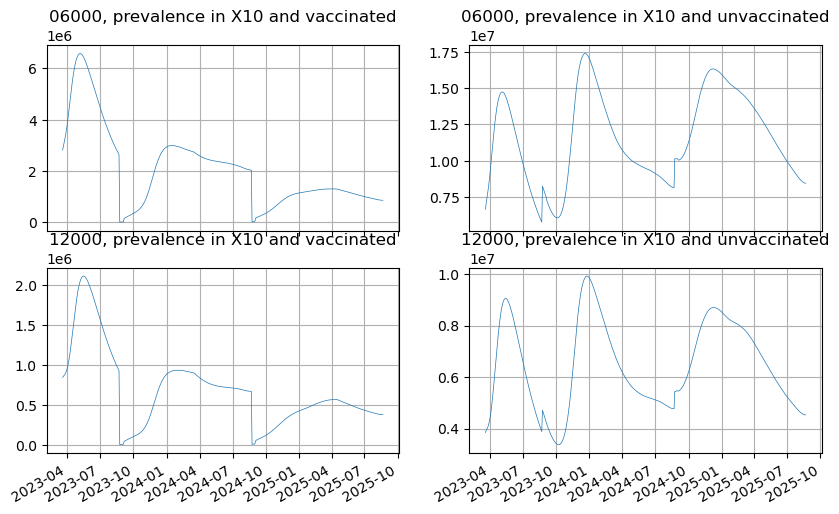

In [ ]:
# cmp_to_plot = [["E", "incidence"],["I1", "incidence"],["I3", "incidence"]]
cmp_to_plot = [["X10", "prevalence", "vaccinated"],["X10", "prevalence", "unvaccinated"]]

fig, axes = plt.subplots(len(node_names_toplot),len(cmp_to_plot), figsize=(5*len(cmp_to_plot),len(node_names_toplot)*3), sharex=True)

for sm in range(len(seir_filenames)):
    dfl = gempyor.read_df(seir_filenames[sm])
    
    for k, c in enumerate(cmp_to_plot):
        df = get_comp_to_plot(dfl, comp_to_plot=c[0], vt = c[1], vacc = c[2])
        for idp, nn in enumerate(node_names_toplot):
            ax = axes[idp,k]
            ax.plot(df[nn], lw=0.5)
            if sm == 0:
                ax.set_title(f"{nn}, {c[1]} in {c[0]} and {c[2]}")
                ax.grid()
            #ax.set_ylim(0)
fig.autofmt_xdate()
# plt.savefig(f"some_comp_for_{len(seir_filenames)}slots.pdf")